In [1]:
import pandas as pd
import numpy as np

# Summary

* This notebook frames and solves the prediction problem
* This includes further refining the dataset and adding features
* Deciding on a timeframe for prediction
* And writing the prediction framework

In [2]:
d = pd.read_csv("211210cleaned_movie_ratings.csv")

/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
d.drop(columns="Unnamed: 0", inplace=True)

In [4]:
d

,user,movie,rating,date,userdate,year,month,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,ur4592644,tt0120884,10,2005-01-16,ur459264416 January 2005,2005,1,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
1,ur9036543,tt0120884,8,2006-01-24,ur903654324 January 2006,2006,1,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
2,ur11167152,tt0120884,8,2011-06-14,ur1116715214 June 2011,2011,6,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
3,ur0055545,tt0120884,8,1999-05-16,ur005554516 May 1999,1999,5,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
4,ur0338514,tt0120884,8,1999-05-22,ur033851422 May 1999,1999,5,tt0120884,movie,When the Light Comes,When the Light Comes,0,1998,\N,115,"Adventure,Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444436,ur3574726,tt0070507,8,2005-01-12,ur357472612 January 2005,2005,1,tt0070507,movie,Panorama Blue,Panorama Blue,0,1974,\N,82,Comedy
3444437,ur3513503,tt0432965,6,2005-01-12,ur351350312 January 2005,2005,1,tt0432965,movie,Mr. Patterns,Mr. Patterns,0,2004,\N,54,Documentary
3444438,ur1219578,tt0287448,3,2005-01-12,ur121957812 January 2005,2005,1,tt0287448,movie,The Warrior's Brother,Le frère du guerrier,0,2002,\N,115,"Drama,History"
3444439,ur4573074,tt0091926,10,2005-01-13,ur457307413 January 2005,2005,1,tt0091926,movie,The 17th Bride,Ha-Kala,0,1985,\N,95,Drama


# Further refining the dataset and adding features

* Let's split genres into dummy variables

In [11]:
d["genre_list"] = d["genres"].str.split(",")

In [14]:
d["genre_list"].apply(lambda x: len(x)).value_counts()

3    2137844
2     851360
1     455237
Name: genre_list, dtype: int64

In [15]:
d["genre_list"][d["genre_list"].apply(lambda x: len(x)) == 1].value_counts()[:50]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Drama]          177863
[Comedy]          98439
[Horror]          64232
[Documentary]     48211
[Thriller]        17754
[Western]         16408
[Action]           7717
[Sci-Fi]           4238
[Romance]          3365
[Adventure]        2637
[Mystery]          2620
[\N]               2440
[Crime]            1863
[Musical]          1681
[Family]           1586
[Adult]             827
[Fantasy]           788
[Animation]         663
[War]               565
[Music]             517
[Biography]         379
[Sport]             260
[History]           179
[Reality-TV]          3
[News]                2
Name: genre_list, dtype: int64

This is definitely not the fastest way to do this, but oh well...

In [19]:
genre_list = ["Drama", "Comedy", "Horror", "Documentary", "Thriller", "Western", "Action", "Sci-Fi", "Romance", "Adventure", "Mystery", "Crime", "Musical", "Family", "Adult", "Fantasy", "Animation", "War", "Music", "Biography", "Sport", "History", "Reality-TV", "News"]
for genre in genre_list:
    d[genre] = 0
    d[genre] = d.apply(lambda row: 1 if genre in row["genre_list"] else 0, axis=1)

In [25]:
d["no_genre"] = d.apply(lambda row: 1 if row[genre_list].sum() == 0 else 0, axis=1)

In [234]:
d

,user,movie,rating,userdate,year,month,tconst,titleType,primaryTitle,originalTitle,...,Fantasy,Animation,War,Music,Biography,Sport,History,Reality-TV,News,no_genre
date,,,,,,,,,,,,,,,,,,,,,
2005-01-16,ur4592644,tt0120884,10,ur459264416 January 2005,2005,1,tt0120884,movie,When the Light Comes,When the Light Comes,...,0,0,0,0,0,0,0,0,0,0
2006-01-24,ur9036543,tt0120884,8,ur903654324 January 2006,2006,1,tt0120884,movie,When the Light Comes,When the Light Comes,...,0,0,0,0,0,0,0,0,0,0
2011-06-14,ur11167152,tt0120884,8,ur1116715214 June 2011,2011,6,tt0120884,movie,When the Light Comes,When the Light Comes,...,0,0,0,0,0,0,0,0,0,0
1999-05-16,ur0055545,tt0120884,8,ur005554516 May 1999,1999,5,tt0120884,movie,When the Light Comes,When the Light Comes,...,0,0,0,0,0,0,0,0,0,0
1999-05-22,ur0338514,tt0120884,8,ur033851422 May 1999,1999,5,tt0120884,movie,When the Light Comes,When the Light Comes,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-01-12,ur3574726,tt0070507,8,ur357472612 January 2005,2005,1,tt0070507,movie,Panorama Blue,Panorama Blue,...,0,0,0,0,0,0,0,0,0,0
2005-01-12,ur3513503,tt0432965,6,ur351350312 January 2005,2005,1,tt0432965,movie,Mr. Patterns,Mr. Patterns,...,0,0,0,0,0,0,0,0,0,0
2005-01-12,ur1219578,tt0287448,3,ur121957812 January 2005,2005,1,tt0287448,movie,The Warrior's Brother,Le frère du guerrier,...,0,0,0,0,0,0,1,0,0,0


* Let's get rid of movies with few votes
* Let's get rid of users with few votes?
* Let's get rid of movies that aren't in English and aren't from the U.S.?

* Let's estimate the release date by the date of the first review, compare this with the kaggle actual release date
* Let's also compute "time since release" dummies for each review, and restrict ourselves to reviews within some span of the original release

# Deciding on a Timeframe for Prediction

My approach is to run a regression of average rating for each movie on months since release. I'll try it with a control for pre and post 2018 as well, and perhaps with movie fixed effects too.

Step 1: figure out when movies came out

In [8]:
kaggle_data = pd.read_csv("IMDb movies.csv")

/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
kaggle_data.head(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0


In [12]:
kaggle_data.shape

(85855, 22)

In [15]:
kaggle_data.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

How much of our original dataset is present in this dataset? How much is missing?

In [16]:
movie_data = pd.read_csv("211210movie_info.csv")

/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
movie_data.drop(columns="Unnamed: 0", inplace=True)

In [21]:
movie_data.head()

,averageReview,primaryTitle,startYear,genres,runtimeMinutes,numReviews,tconst,averageRating,numVotes,diffRating,ratioVotes
0,8.666667,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",70,6,tt0000574,6.1,737,-2.566667,122.833333
1,7.000000,The White Slave Trade,1910,Drama,45,1,tt0001258,5.8,136,-1.200000,136.000000
2,6.000000,The Life of Moses,1909,"Biography,Drama,Family",50,1,tt0001285,5.4,56,-0.600000,56.000000
3,4.000000,In the Prime of Life,1911,Drama,52,1,tt0001592,5.5,14,1.500000,14.000000
4,5.000000,Den sorte drøm,1911,Drama,53,4,tt0001892,5.9,218,0.900000,54.500000


In [22]:
movie_data.shape

(136285, 11)

In [23]:
movies_with_release_dates = movie_data[movie_data["tconst"].isin(kaggle_data["imdb_title_id"])]

In [24]:
movies_without_release_dates = movie_data[~movie_data["tconst"].isin(kaggle_data["imdb_title_id"])]

In [25]:
movies_with_release_dates

,averageReview,primaryTitle,startYear,genres,runtimeMinutes,numReviews,tconst,averageRating,numVotes,diffRating,ratioVotes
0,8.666667,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",70,6,tt0000574,6.1,737,-2.566667,122.833333
4,5.000000,Den sorte drøm,1911,Drama,53,4,tt0001892,5.9,218,0.900000,54.500000
7,4.823529,Cleopatra,1912,"Drama,History",100,17,tt0002101,5.1,523,0.276471,30.764706
8,7.321429,Dante's Inferno,1911,"Adventure,Drama,Fantasy",71,28,tt0002130,7.0,2713,-0.321429,96.892857
11,6.000000,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography,Drama",60,9,tt0002199,5.8,575,-0.200000,63.888889
...,...,...,...,...,...,...,...,...,...,...,...
136265,4.276596,Enemy Lines,2020,War,92,47,tt9904802,4.5,1432,0.223404,30.468085
136268,2.000000,Ottam,2019,Drama,120,3,tt9905412,7.3,563,5.300000,187.666667
136269,8.500000,Pengalila,2019,Drama,111,2,tt9905462,8.2,671,-0.300000,335.500000
136274,7.777778,Manoharam,2019,"Comedy,Drama",122,9,tt9906644,6.8,707,-0.977778,78.555556


In [33]:
movies_without_release_dates["startYear"].value_counts().head(20)

2017    1999
2016    1936
2015    1920
2014    1878
2013    1782
2012    1685
2019    1628
2011    1587
2020    1571
2010    1442
2009    1369
2008    1251
2018    1228
2006    1163
2018    1162
2005    1155
2007    1145
2004    1018
2003     903
2019     894
Name: startYear, dtype: int64

In [41]:
(movies_without_release_dates["startYear"] == "\\N").sum()

4

In [50]:
movies_without_release_dates[(movies_without_release_dates["numVotes"] > 500)]

,averageReview,primaryTitle,startYear,genres,runtimeMinutes,numReviews,tconst,averageRating,numVotes,diffRating,ratioVotes
51,7.333333,Fantômas: The False Magistrate,1914,"Crime,Drama",70,3,tt0003952,6.9,1056,-0.433333,352.000000
520,8.540541,The Penalty,1920,"Crime,Drama,Horror",90,37,tt0011565,7.4,2313,-1.140541,62.513514
671,7.800000,Dr. Mabuse the Gambler,1922,"Crime,Mystery,Thriller",242,35,tt0013086,7.9,8074,0.100000,230.685714
686,8.144737,Häxan,1922,"Documentary,Fantasy,History",91,76,tt0013257,7.7,13616,-0.444737,179.157895
703,8.571429,Nanook of the North,1922,Documentary,78,35,tt0013427,7.6,11678,-0.971429,333.657143
...,...,...,...,...,...,...,...,...,...,...,...
136224,8.844444,Chasing Happiness,2019,"Biography,Documentary,Music",96,45,tt9882084,7.8,2138,-1.044444,47.511111
136245,8.000000,Felicità,2020,"Comedy,Drama",81,1,tt9894450,6.7,847,-1.300000,847.000000
136260,10.000000,Herself,2020,Drama,97,1,tt9902160,7.0,2862,-3.000000,2862.000000
136282,4.000000,Il talento del calabrone,2020,Thriller,84,4,tt9916270,5.8,1218,1.800000,304.500000


In [51]:
movies_without_release_dates[(movies_without_release_dates["numVotes"] > 500) & (movies_without_release_dates["startYear"] != "2020")]["numVotes"].describe()

count      3834.000000
mean       3976.937663
std        8400.790807
min         501.000000
25%         818.250000
50%        1704.500000
75%        3965.500000
max      151911.000000
Name: numVotes, dtype: float64

In [43]:
movies_without_release_dates[(movies_without_release_dates["startYear"] != "\\N") & movies_without_release_dates["startYear"] < 2020]["numVotes"].describe()

count     59185.000000
mean        378.777004
std        3089.092411
min           5.000000
25%          29.000000
50%          58.000000
75%         102.000000
max      284978.000000
Name: numVotes, dtype: float64

In [55]:
movies_without_release_dates["numReviews"].sort_values(ascending=False)

82776     4627
118547    2212
82181     1465
118587    1412
135928    1400
131366    1362
90129     1074
129343    1005
67860      977
135508     969
131602     912
130003     839
83800      817
122876     803
135620     703
64464      665
78300      643
89711      602
82220      566
84287      548
89626      539
84452      530
89198      523
89763      515
77181      492
86073      472
132803     442
81823      433
134908     425
90186      407
70751      399
69880      398
134372     389
103862     387
83886      386
72540      375
84536      372
133323     372
133437     368
132681     362
78633      345
70246      344
89536      344
84902      342
132201     342
87523      341
82796      332
127926     328
72638      320
103684     319
Name: numReviews, dtype: int64

These must generally be movies with no reviews

In [28]:
kaggle_data[~kaggle_data["imdb_title_id"].isin(movie_data["tconst"])]["votes"].describe()

count     8755.000000
mean       317.240548
std        757.184225
min        100.000000
25%        129.000000
50%        183.000000
75%        312.500000
max      55929.000000
Name: votes, dtype: float64

* Let's get rid of movies that came out before most of the imdb data (pre 2005)

In [63]:
movie_data[movie_data["startYear"] == "\\N"] # probably no harm in losing these too

,averageReview,primaryTitle,startYear,genres,runtimeMinutes,numReviews,tconst,averageRating,numVotes,diffRating,ratioVotes
26697,5.333333,Atlantic City Jackpot,\N,"Action,Drama",88,3,tt0073399,5.6,57,0.266667,19.00
33440,6.000000,Unternehmen Geigenkasten,\N,"Crime,Family",82,1,tt0090238,7.5,31,1.500000,31.00
82484,4.700000,Tied in Blood,\N,"Drama,Horror,Mystery",88,10,tt1027755,3.5,222,-1.200000,22.20
86877,2.750000,Sri Bharatha Baahubali,\N,Comedy,164,4,tt11777460,7.7,2561,4.950000,640.25
105570,10.000000,As Words Breathe,\N,Drama,80,1,tt2368535,7.9,19,-2.100000,19.00


In [64]:
movie_data = movie_data[movie_data["startYear"] != "\\N"]

In [67]:
movie_data["startYear"] = movie_data["startYear"].astype(int)

<ipython-input-67-271fb51597ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data["startYear"] = movie_data["startYear"].astype(int)


In [74]:
movie_data[movie_data["startYear"] >= 2005]

,averageReview,primaryTitle,startYear,genres,runtimeMinutes,numReviews,tconst,averageRating,numVotes,diffRating,ratioVotes
24790,6.237500,The Other Side of the Wind,2018,Drama,122,80,tt0069049,6.8,6930,0.562500,86.625000
32802,7.600000,The Naked Monster,2005,"Comedy,Horror,Sci-Fi",100,15,tt0088751,5.4,314,-2.200000,20.933333
34564,4.375000,Grizzly II: Revenge,2020,"Horror,Music,Thriller",74,8,tt0093119,3.2,840,-1.175000,105.000000
41078,8.333333,Master i Margarita,2006,"Drama,Fantasy",125,3,tt0110476,6.6,607,-1.733333,202.333333
43192,7.000000,Mariette in Ecstasy,2019,Drama,101,1,tt0116991,7.4,67,0.400000,67.000000
...,...,...,...,...,...,...,...,...,...,...,...
136280,5.500000,9/11: Escape from the Towers,2018,Documentary,120,2,tt9914644,8.2,93,2.700000,46.500000
136281,8.129032,Safeguard,2020,"Action,Adventure,Thriller",90,62,tt9916190,3.6,226,-4.529032,3.645161
136282,4.000000,Il talento del calabrone,2020,Thriller,84,4,tt9916270,5.8,1218,1.800000,304.500000
136283,10.000000,Coven,2020,"Drama,History",92,1,tt9916362,6.4,4085,-3.600000,4085.000000


Restricting to just movies that came out in or after 2005 cuts us down to 62k movies... let's do it

In [75]:
movie_data = movie_data[movie_data["startYear"] >= 2005]

In [78]:
d = d[d["startYear"] != "\\N"]

In [79]:
d["startYear"] = d["startYear"].astype(int)

<ipython-input-79-9aa294727fd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["startYear"] = d["startYear"].astype(int)


In [80]:
d = d[d["startYear"] >= 2005]

In [81]:
d

,user,movie,rating,date,userdate,year,month,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
17247,ur1529007,tt0357277,3,2005-01-16,ur152900716 January 2005,2005,1,tt0357277,movie,Elektra,Elektra,0,2005,\N,97,"Action,Adventure,Crime"
17248,ur2705247,tt0357277,10,2005-01-16,ur270524716 January 2005,2005,1,tt0357277,movie,Elektra,Elektra,0,2005,\N,97,"Action,Adventure,Crime"
17249,ur1976369,tt0357277,5,2005-01-16,ur197636916 January 2005,2005,1,tt0357277,movie,Elektra,Elektra,0,2005,\N,97,"Action,Adventure,Crime"
17250,ur3198732,tt0357277,10,2005-01-16,ur319873216 January 2005,2005,1,tt0357277,movie,Elektra,Elektra,0,2005,\N,97,"Action,Adventure,Crime"
17251,ur4571533,tt0357277,10,2005-01-16,ur457153316 January 2005,2005,1,tt0357277,movie,Elektra,Elektra,0,2005,\N,97,"Action,Adventure,Crime"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443887,ur1708449,tt0383477,3,2003-11-10,ur170844910 November 2003,2003,11,tt0383477,movie,Love & Orgasms,Love & Orgasms,0,2020,\N,82,Drama
3443888,ur3716609,tt0383477,8,2004-11-13,ur371660913 November 2004,2004,11,tt0383477,movie,Love & Orgasms,Love & Orgasms,0,2020,\N,82,Drama
3444107,ur3846690,tt0420055,9,2004-08-19,ur384669019 August 2004,2004,8,tt0420055,movie,P.O.E.,P.O.E.,0,2007,\N,107,"Drama,Mystery"
3444407,ur4095387,tt0410806,10,2005-01-03,ur40953873 January 2005,2005,1,tt0410806,movie,Three Days of Anarchy,Tre giorni di anarchia,0,2005,\N,102,Drama


At this point, we've largely gotten rid of movies that came out before 2005... except if we're computing release date based on first review date this isn't necessarily true... let's restrict our data to movies with over 100 reviews where the first review is after 2005.

In [100]:
(d["startYear"] > d["year"]).sum()

2807

So somehow 2807 ratings were left before the movie came out...

Two questions:
* does the kaggle data line up with our start years?
* can the kaggle data be used for our start years that aren't present?

Finding: kaggle data doesn't actually have all the informative release dates. To deal with this, we use the kaggle data when it has a release date, and the earliest review when it doesn't have a release date.

To start, let's get the kaggle entries with a release date:

In [112]:
present_release_dates = movie_data["date_published"].value_counts().index[movie_data["date_published"].value_counts().index.str.len() == 10]

In [114]:
movie_data[movie_data["date_published"].isin(present_release_dates)]

,averageReview,primaryTitle,startYear,genres,runtimeMinutes,numReviews,tconst,averageRating,numVotes,diffRating,ratioVotes,date_published,imdb_title_id
0,6.237500,The Other Side of the Wind,2018,Drama,122,80,tt0069049,6.8,6930,0.562500,86.625000,2018-11-02,tt0069049
1,7.600000,The Naked Monster,2005,"Comedy,Horror,Sci-Fi",100,15,tt0088751,5.4,314,-2.200000,20.933333,2005-04-22,tt0088751
3,8.333333,Master i Margarita,2006,"Drama,Fantasy",125,3,tt0110476,6.6,607,-1.733333,202.333333,2011-04-07,tt0110476
6,6.444444,What Is It?,2005,Drama,72,18,tt0118141,5.6,894,-0.844444,49.666667,2005-01-27,tt0118141
7,1.000000,The Junior Defenders,2007,Comedy,83,1,tt0119231,4.4,181,3.400000,181.000000,2007-10-23,tt0119231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62478,4.276596,Enemy Lines,2020,War,92,47,tt9904802,4.5,1432,0.223404,30.468085,2020-05-04,tt9904802
62481,2.000000,Ottam,2019,Drama,120,3,tt9905412,7.3,563,5.300000,187.666667,2019-03-08,tt9905412
62482,8.500000,Pengalila,2019,Drama,111,2,tt9905462,8.2,671,-0.300000,335.500000,2019-03-08,tt9905462
62487,7.777778,Manoharam,2019,"Comedy,Drama",122,9,tt9906644,6.8,707,-0.977778,78.555556,2019-09-27,tt9906644


Some of these release dates aren't legit... is there a way to do a robustness check on these release dates? Maybe look for the month in which 1% of reviews had come out?

What if we instead look at the date of the first review as a proxy for when a movie came out, and then we can do some robustness checks based off of that.

In [120]:
d["date"] = pd.to_datetime(d["date"])

In [125]:
movie_data = movie_data.merge(d.groupby("movie")["date"].min(), left_on="tconst", right_on="movie").rename(columns={"date": "first_review"})

<AxesSubplot:xlabel='date'>

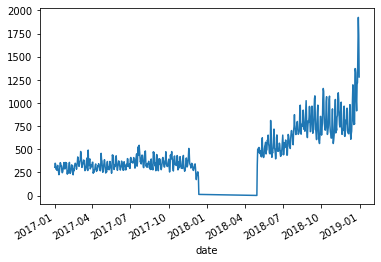

In [182]:
d[(d["year"] == 2018) | (d["year"] == 2017)].groupby("date")["rating"].count().plot()

In [140]:
movie_data[movie_data["numReviews"] > 0]["numVotes"].describe()

count    3.612000e+03
mean     1.160727e+05
std      1.704968e+05
min      1.550000e+02
25%      2.390225e+04
50%      5.741700e+04
75%      1.309378e+05
max      2.442962e+06
Name: numVotes, dtype: float64

In [148]:
popular_release_dates = movie_data[movie_data["numReviews"] > 100]["date_published"].value_counts().index[movie_data[movie_data["numReviews"] > 100]["date_published"].value_counts().index.str.len() == 10]

Let's drop the movies with weird date_published values

In [162]:
popular_movie_data = movie_data[(movie_data["numReviews"] > 100) & ~((~movie_data["date_published"].isin(popular_release_dates)) & (movie_data["date_published"].notna()))]

In [163]:
popular_movie_data

,averageReview,primaryTitle,startYear,genres,runtimeMinutes,numReviews,tconst,averageRating,numVotes,diffRating,ratioVotes,date_published,imdb_title_id,first_review
9,6.075258,Fantastic Four,2005,"Action,Adventure,Fantasy",106,970,tt0120667,5.7,320223,-0.375258,330.126804,2005-09-16,tt0120667,2005-06-23
10,7.508911,Corpse Bride,2005,"Animation,Drama,Family",77,505,tt0121164,7.3,258690,-0.208911,512.257426,2005-10-28,tt0121164,2005-08-02
11,7.209377,Star Wars: Episode III - Revenge of the Sith,2005,"Action,Adventure,Fantasy",140,3434,tt0121766,7.5,742810,0.290623,216.310425,2005-05-20,tt0121766,2005-05-04
32,7.412621,The Bank Job,2008,"Crime,Drama,Thriller",111,206,tt0200465,7.2,178090,-0.212621,864.514563,2008-02-28,tt0200465,2008-02-11
36,6.838735,Children of Men,2006,"Action,Drama,Sci-Fi",109,1296,tt0206634,7.9,482291,1.061265,372.138117,2006-11-17,tt0206634,2006-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62411,4.686667,Holidate,2020,"Comedy,Romance",104,300,tt9866072,6.1,54537,1.413333,181.790000,NaN,NaN,2020-10-28
62415,9.350299,Paranormal Investigation,2018,"Horror,Thriller",92,334,tt9866700,3.7,1601,-5.650299,4.793413,2018-12-01,tt9866700,2019-03-03
62429,6.625000,Malang,2020,"Action,Crime,Drama",135,264,tt9877170,6.5,9750,-0.125000,36.931818,NaN,NaN,2020-02-07
62464,3.702073,Coffee & Kareem,2020,"Action,Comedy,Crime",88,386,tt9898858,5.1,12943,1.397927,33.531088,2020-04-03,tt9898858,2020-04-03


In [159]:
popular_release_dates

Index(['2019-03-29', '2006-11-17', '2007-02-23', '2018-11-08', '2007-01-26',
       '2006-06-23', '2008-12-05', '2011-10-21', '2019-08-29', '2006-02-24',
       ...
       '2016-09-21', '2018-02-23', '2019-12-10', '2020-08-12', '2019-08-02',
       '2019-04-30', '2009-05-13', '2007-11-15', '2016-03-04', '2007-04-24'],
      dtype='object', length=1527)

In [86]:
kaggle_data.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [91]:
movie_data = movie_data.merge(kaggle_data[["date_published", "imdb_title_id"]], left_on="tconst", right_on="imdb_title_id", how="left")

So clearly this date_published isn't the answer to all our problems...

Honestly, I think the first_review date is the best. One way to check it is to see what percent of reviews are in the following month

In [166]:
movie_data

,averageReview,primaryTitle,startYear,genres,runtimeMinutes,numReviews,tconst,averageRating,numVotes,diffRating,ratioVotes,date_published,imdb_title_id,first_review
0,6.237500,The Other Side of the Wind,2018,Drama,122,80,tt0069049,6.8,6930,0.562500,86.625000,2018-11-02,tt0069049,2018-09-30
1,7.600000,The Naked Monster,2005,"Comedy,Horror,Sci-Fi",100,15,tt0088751,5.4,314,-2.200000,20.933333,2005-04-22,tt0088751,2005-05-24
2,4.375000,Grizzly II: Revenge,2020,"Horror,Music,Thriller",74,8,tt0093119,3.2,840,-1.175000,105.000000,1983,tt0093119,2007-02-16
3,8.333333,Master i Margarita,2006,"Drama,Fantasy",125,3,tt0110476,6.6,607,-1.733333,202.333333,2011-04-07,tt0110476,2007-01-16
4,7.000000,Mariette in Ecstasy,2019,Drama,101,1,tt0116991,7.4,67,0.400000,67.000000,NaN,NaN,1999-12-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62493,5.500000,9/11: Escape from the Towers,2018,Documentary,120,2,tt9914644,8.2,93,2.700000,46.500000,NaN,NaN,2019-09-16
62494,8.129032,Safeguard,2020,"Action,Adventure,Thriller",90,62,tt9916190,3.6,226,-4.529032,3.645161,NaN,NaN,2020-11-11
62495,4.000000,Il talento del calabrone,2020,Thriller,84,4,tt9916270,5.8,1218,1.800000,304.500000,NaN,NaN,2020-11-19
62496,10.000000,Coven,2020,"Drama,History",92,1,tt9916362,6.4,4085,-3.600000,4085.000000,NaN,NaN,2020-09-22


In [167]:
d.drop(columns=["runtimeMinutes", "titleType", "userdate"], inplace=True)

Using the first release date as the event beginning time, let's come up with labels for whether the review is in the following period. Let's do period via 4 week quads.

In [169]:
d = d.merge(movie_data[["tconst", "first_review"]], how="left", left_on="tconst", right_on="tconst")

In [170]:
d

,user,movie,rating,date,year,month,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,first_review
0,ur1529007,tt0357277,3,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,2005,\N,"Action,Adventure,Crime",2005-01-12
1,ur2705247,tt0357277,10,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,2005,\N,"Action,Adventure,Crime",2005-01-12
2,ur1976369,tt0357277,5,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,2005,\N,"Action,Adventure,Crime",2005-01-12
3,ur3198732,tt0357277,10,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,2005,\N,"Action,Adventure,Crime",2005-01-12
4,ur4571533,tt0357277,10,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,2005,\N,"Action,Adventure,Crime",2005-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987981,ur1708449,tt0383477,3,2003-11-10,2003,11,tt0383477,Love & Orgasms,Love & Orgasms,0,2020,\N,Drama,2003-11-10
1987982,ur3716609,tt0383477,8,2004-11-13,2004,11,tt0383477,Love & Orgasms,Love & Orgasms,0,2020,\N,Drama,2003-11-10
1987983,ur3846690,tt0420055,9,2004-08-19,2004,8,tt0420055,P.O.E.,P.O.E.,0,2007,\N,"Drama,Mystery",2004-08-19
1987984,ur4095387,tt0410806,10,2005-01-03,2005,1,tt0410806,Three Days of Anarchy,Tre giorni di anarchia,0,2005,\N,Drama,2005-01-03


In [171]:
from datetime import timedelta

In [172]:
d["first_review"]

0         2005-01-12
1         2005-01-12
2         2005-01-12
3         2005-01-12
4         2005-01-12
             ...    
1987981   2003-11-10
1987982   2003-11-10
1987983   2004-08-19
1987984   2005-01-03
1987985   2005-01-11
Name: first_review, Length: 1987986, dtype: datetime64[ns]

In [176]:
d["quad1"] = (d["first_review"] + timedelta(days=28)) > d["date"]

In [177]:
d["quad2"] = ((d["first_review"] + timedelta(days=28*2)) > d["date"]) & (d["quad1"] == 0)

In [178]:
d["quad3"] = ((d["first_review"] + timedelta(days=28*3)) > d["date"]) & (d["quad2"] == 0)
d["quad4"] = ((d["first_review"] + timedelta(days=28*4)) > d["date"]) & (d["quad3"] == 0)
d["quad5"] = ((d["first_review"] + timedelta(days=28*5)) > d["date"]) & (d["quad4"] == 0)
d["quad6"] = ((d["first_review"] + timedelta(days=28*6)) > d["date"]) & (d["quad5"] == 0)
d["quad7"] = ((d["first_review"] + timedelta(days=28*7)) > d["date"]) & (d["quad6"] == 0)
d["quad8"] = ((d["first_review"] + timedelta(days=28*8)) > d["date"]) & (d["quad7"] == 0)
d["quad9"] = ((d["first_review"] + timedelta(days=28*9)) > d["date"]) & (d["quad8"] == 0)
d["quad10"] = ((d["first_review"] + timedelta(days=28*10)) > d["date"]) & (d["quad9"] == 0)
d["quad11"] = ((d["first_review"] + timedelta(days=28*11)) > d["date"]) & (d["quad10"] == 0)
d["quad12"] = ((d["first_review"] + timedelta(days=28*12)) > d["date"]) & (d["quad11"] == 0)
d["quad13"] = ((d["first_review"] + timedelta(days=28*13)) > d["date"]) & (d["quad12"] == 0)
d["quad14"] = ((d["first_review"] + timedelta(days=28*14)) > d["date"]) & (d["quad13"] == 0)
d["quad15"] = ((d["first_review"] + timedelta(days=28*15)) > d["date"]) & (d["quad14"] == 0)
d["quad16"] = ((d["first_review"] + timedelta(days=28*16)) > d["date"]) & (d["quad15"] == 0)
d["quad17"] = ((d["first_review"] + timedelta(days=28*17)) > d["date"]) & (d["quad16"] == 0)
d["quad18"] = ((d["first_review"] + timedelta(days=28*18)) > d["date"]) & (d["quad17"] == 0)
d["quad19"] = ((d["first_review"] + timedelta(days=28*19)) > d["date"]) & (d["quad18"] == 0)
d["quad20"] = ((d["first_review"] + timedelta(days=28*20)) > d["date"]) & (d["quad19"] == 0)
d["quad21"] = ((d["first_review"] + timedelta(days=28*21)) > d["date"]) & (d["quad20"] == 0)
d["quad22"] = ((d["first_review"] + timedelta(days=28*22)) > d["date"]) & (d["quad21"] == 0)
d["quad23"] = ((d["first_review"] + timedelta(days=28*23)) > d["date"]) & (d["quad22"] == 0)
d["quad24"] = ((d["first_review"] + timedelta(days=28*24)) > d["date"]) & (d["quad23"] == 0)
d["quad25"] = ((d["first_review"] + timedelta(days=28*25)) > d["date"]) & (d["quad24"] == 0)
d["quad26"] = ((d["first_review"] + timedelta(days=28*26)) > d["date"]) & (d["quad25"] == 0)

In [179]:
d

,user,movie,rating,date,year,month,tconst,primaryTitle,originalTitle,isAdult,...,quad17,quad18,quad19,quad20,quad21,quad22,quad23,quad24,quad25,quad26
0,ur1529007,tt0357277,3,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,...,True,False,True,False,True,False,True,False,True,False
1,ur2705247,tt0357277,10,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,...,True,False,True,False,True,False,True,False,True,False
2,ur1976369,tt0357277,5,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,...,True,False,True,False,True,False,True,False,True,False
3,ur3198732,tt0357277,10,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,...,True,False,True,False,True,False,True,False,True,False
4,ur4571533,tt0357277,10,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987981,ur1708449,tt0383477,3,2003-11-10,2003,11,tt0383477,Love & Orgasms,Love & Orgasms,0,...,True,False,True,False,True,False,True,False,True,False
1987982,ur3716609,tt0383477,8,2004-11-13,2004,11,tt0383477,Love & Orgasms,Love & Orgasms,0,...,False,True,False,True,False,True,False,True,False,True
1987983,ur3846690,tt0420055,9,2004-08-19,2004,8,tt0420055,P.O.E.,P.O.E.,0,...,True,False,True,False,True,False,True,False,True,False
1987984,ur4095387,tt0410806,10,2005-01-03,2005,1,tt0410806,Three Days of Anarchy,Tre giorni di anarchia,0,...,True,False,True,False,True,False,True,False,True,False


Want to track which quads overlap first three months of 2018, and which cover 2019, 2020

In [198]:
movie_data[movie_data["first_review"] < pd.datetime(2005,1,1)]["numReviews"].describe()

<ipython-input-198-15265842a088>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  movie_data[movie_data["first_review"] < pd.datetime(2005,1,1)]["numReviews"].describe()


count     72.000000
mean      40.222222
std       94.177570
min        1.000000
25%        2.750000
50%        7.500000
75%       22.250000
max      509.000000
Name: numReviews, dtype: float64

In [196]:
d[d["first_review"] < pd.datetime(2005,1,1)]

<ipython-input-196-233d42984c39>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d[d["first_review"] < pd.datetime(2005,1,1)]


,user,movie,rating,date,year,month,tconst,primaryTitle,originalTitle,isAdult,...,quad17,quad18,quad19,quad20,quad21,quad22,quad23,quad24,quad25,quad26
329,ur0941716,tt0375210,2,2005-01-16,2005,1,tt0375210,White Noise,White Noise,0,...,False,True,False,True,False,True,False,True,False,True
330,ur3778826,tt0375210,2,2005-01-16,2005,1,tt0375210,White Noise,White Noise,0,...,False,True,False,True,False,True,False,True,False,True
331,ur1293485,tt0375210,3,2005-01-16,2005,1,tt0375210,White Noise,White Noise,0,...,False,True,False,True,False,True,False,True,False,True
332,ur4595705,tt0375210,1,2005-01-16,2005,1,tt0375210,White Noise,White Noise,0,...,False,True,False,True,False,True,False,True,False,True
333,ur1722659,tt0375210,2,2005-01-16,2005,1,tt0375210,White Noise,White Noise,0,...,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987979,ur3683729,tt0363779,7,2004-07-11,2004,7,tt0363779,Lustre,Lustre,0,...,True,False,True,False,True,False,True,False,True,False
1987980,ur1612550,tt0368311,10,2004-01-21,2004,1,tt0368311,Superhero Excelsior,Superhero Excelsior,0,...,True,False,True,False,True,False,True,False,True,False
1987981,ur1708449,tt0383477,3,2003-11-10,2003,11,tt0383477,Love & Orgasms,Love & Orgasms,0,...,True,False,True,False,True,False,True,False,True,False
1987982,ur3716609,tt0383477,8,2004-11-13,2004,11,tt0383477,Love & Orgasms,Love & Orgasms,0,...,False,True,False,True,False,True,False,True,False,True


In [193]:
d.sort_values("first_review")[:50]

,user,movie,rating,date,year,month,tconst,primaryTitle,originalTitle,isAdult,...,quad17,quad18,quad19,quad20,quad21,quad22,quad23,quad24,quad25,quad26
17980,ur3500019,tt0118141,5,2006-11-13,2006,11,tt0118141,What Is It?,What Is It?,0,...,False,False,False,False,False,False,False,False,False,False
17991,ur36940432,tt0118141,1,2015-11-24,2015,11,tt0118141,What Is It?,What Is It?,0,...,False,False,False,False,False,False,False,False,False,False
17990,ur32850256,tt0118141,10,2012-04-01,2012,4,tt0118141,What Is It?,What Is It?,0,...,False,False,False,False,False,False,False,False,False,False
17989,ur28684592,tt0118141,10,2012-02-24,2012,2,tt0118141,What Is It?,What Is It?,0,...,False,False,False,False,False,False,False,False,False,False
17988,ur16748888,tt0118141,10,2010-09-14,2010,9,tt0118141,What Is It?,What Is It?,0,...,False,False,False,False,False,False,False,False,False,False
17986,ur20720653,tt0118141,10,2009-10-05,2009,10,tt0118141,What Is It?,What Is It?,0,...,False,False,False,False,False,False,False,False,False,False
17985,ur2073899,tt0118141,9,2002-12-11,2002,12,tt0118141,What Is It?,What Is It?,0,...,False,False,False,False,False,False,False,False,False,False
17984,ur0171885,tt0118141,7,1999-02-09,1999,2,tt0118141,What Is It?,What Is It?,0,...,True,False,True,False,True,False,True,False,True,False
17983,ur10537184,tt0118141,4,2008-08-29,2008,8,tt0118141,What Is It?,What Is It?,0,...,False,False,False,False,False,False,False,False,False,False
17987,ur23343176,tt0118141,10,2010-06-02,2010,6,tt0118141,What Is It?,What Is It?,0,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:ylabel='Frequency'>

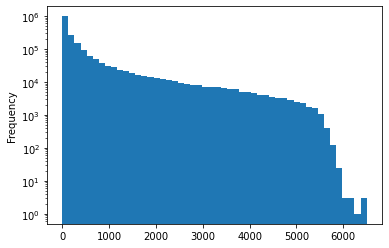

In [207]:
(d["date"] - d["first_review"]).dt.days.plot(kind="hist", bins=50, log=True)

<AxesSubplot:ylabel='Frequency'>

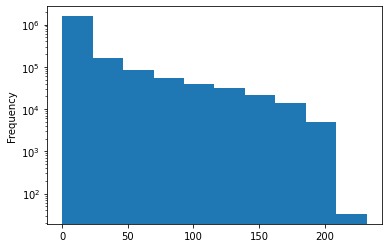

In [208]:
((d["date"] - d["first_review"]).dt.days // 28).plot(kind="hist", log=True)

So there's actually a good number up until like 5000

In [203]:
5000 / 365

13.698630136986301

Note that it's because we have at least 15 years of solid data in here

In [210]:
d["quad_offset"] = (d["date"] - d["first_review"]).dt.days  // 28

In [211]:
d

,user,movie,rating,date,year,month,tconst,primaryTitle,originalTitle,isAdult,...,quad18,quad19,quad20,quad21,quad22,quad23,quad24,quad25,quad26,quad_offset
0,ur1529007,tt0357277,3,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,...,False,True,False,True,False,True,False,True,False,0.0
1,ur2705247,tt0357277,10,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,...,False,True,False,True,False,True,False,True,False,0.0
2,ur1976369,tt0357277,5,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,...,False,True,False,True,False,True,False,True,False,0.0
3,ur3198732,tt0357277,10,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,...,False,True,False,True,False,True,False,True,False,0.0
4,ur4571533,tt0357277,10,2005-01-16,2005,1,tt0357277,Elektra,Elektra,0,...,False,True,False,True,False,True,False,True,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987981,ur1708449,tt0383477,3,2003-11-10,2003,11,tt0383477,Love & Orgasms,Love & Orgasms,0,...,False,True,False,True,False,True,False,True,False,0.0
1987982,ur3716609,tt0383477,8,2004-11-13,2004,11,tt0383477,Love & Orgasms,Love & Orgasms,0,...,True,False,True,False,True,False,True,False,True,13.0
1987983,ur3846690,tt0420055,9,2004-08-19,2004,8,tt0420055,P.O.E.,P.O.E.,0,...,False,True,False,True,False,True,False,True,False,0.0
1987984,ur4095387,tt0410806,10,2005-01-03,2005,1,tt0410806,Three Days of Anarchy,Tre giorni di anarchia,0,...,False,True,False,True,False,True,False,True,False,0.0


Now let's get the average computed. If we want our regression spec to be rating ~ quad, we're actually fine

In [222]:
np.zeros(3) + 1

array([1., 1., 1.])

In [223]:
n_movies = d["movie"].nunique()

In [233]:
d[d["quad_offset"] <= 0].groupby("movie").agg({"rating": [np.mean, np.sum]})

rating     
                mean  sum
movie                    
tt0069049   8.000000    8
tt0088751   9.500000   19
tt0093119   5.000000    5
tt0110476   9.000000    9
tt0116991   7.000000    7
...              ...  ...
tt9914644   2.000000    2
tt9916190   8.129032  504
tt9916270   4.000000   16
tt9916362  10.000000   10
tt9916428   8.000000    8

[62498 rows x 2 columns]

In [235]:
panel = []
for i in range(200):
    print(i)
    temp = pd.DataFrame(d[d["quad_offset"] <= i].groupby("movie")["rating"].mean())
    temp["quad_offset"] = i
    temp["num_reviews"] = d[d["quad_offset"] <= i].groupby("movie")["rating"].count()
    panel.append(temp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [236]:
result = pd.concat(panel)

In [237]:
result

,rating,quad_offset,num_reviews
movie,,,
tt0069049,8.000000,0,1
tt0088751,9.500000,0,2
tt0093119,5.000000,0,1
tt0110476,9.000000,0,1
tt0116991,7.000000,0,1
...,...,...,...
tt9914644,5.500000,199,2
tt9916190,8.129032,199,62
tt9916270,4.000000,199,4


We're expecting 60k * 200 rows

In [241]:
60000*200

12000000

Checks out

In [240]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import statsmodels.formula.api as smf
# this is brutal on memory...
reg1 = smf.ols(formula="rating ~ C(quad_offset)", data=result).fit()# endog=d["rating"], exog=d[[""]])

KeyboardInterrupt: 

In [ ]:
reg1.summary()popular_movie_data

In [242]:
movie_data

,averageReview,primaryTitle,startYear,genres,runtimeMinutes,numReviews,tconst,averageRating,numVotes,diffRating,ratioVotes,date_published,imdb_title_id,first_review
0,6.237500,The Other Side of the Wind,2018,Drama,122,80,tt0069049,6.8,6930,0.562500,86.625000,2018-11-02,tt0069049,2018-09-30
1,7.600000,The Naked Monster,2005,"Comedy,Horror,Sci-Fi",100,15,tt0088751,5.4,314,-2.200000,20.933333,2005-04-22,tt0088751,2005-05-24
2,4.375000,Grizzly II: Revenge,2020,"Horror,Music,Thriller",74,8,tt0093119,3.2,840,-1.175000,105.000000,1983,tt0093119,2007-02-16
3,8.333333,Master i Margarita,2006,"Drama,Fantasy",125,3,tt0110476,6.6,607,-1.733333,202.333333,2011-04-07,tt0110476,2007-01-16
4,7.000000,Mariette in Ecstasy,2019,Drama,101,1,tt0116991,7.4,67,0.400000,67.000000,NaN,NaN,1999-12-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62493,5.500000,9/11: Escape from the Towers,2018,Documentary,120,2,tt9914644,8.2,93,2.700000,46.500000,NaN,NaN,2019-09-16
62494,8.129032,Safeguard,2020,"Action,Adventure,Thriller",90,62,tt9916190,3.6,226,-4.529032,3.645161,NaN,NaN,2020-11-11
62495,4.000000,Il talento del calabrone,2020,Thriller,84,4,tt9916270,5.8,1218,1.800000,304.500000,NaN,NaN,2020-11-19
62496,10.000000,Coven,2020,"Drama,History",92,1,tt9916362,6.4,4085,-3.600000,4085.000000,NaN,NaN,2020-09-22


In [248]:
result[(result.index.isin(movie_data[movie_data["numReviews"] > 100]["tconst"])) & (result["quad_offset"] < 24)]

,rating,quad_offset,num_reviews
movie,,,
tt0120667,6.649635,0,411
tt0121164,8.000000,0,1
tt0121766,7.276978,0,1668
tt0200465,7.500000,0,20
tt0206634,8.117647,0,51
...,...,...,...
tt9866072,4.686667,23,300
tt9866700,9.350299,23,334
tt9877170,6.625000,23,264


In [277]:
reg_popular_ratings = smf.ols(formula="num_reviews ~ C(quad_offset)", data=result[(result.index.isin(movie_data[movie_data["numReviews"] > 100]["tconst"])) & (result["quad_offset"] < 48)]).fit()

<AxesSubplot:>

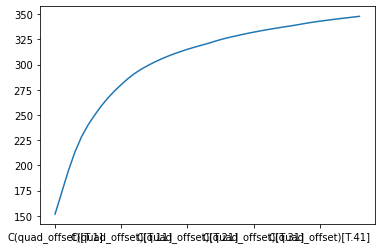

In [293]:
(reg_popular_ratings.params[1:] + reg_popular_ratings.params[0]).plot()

<AxesSubplot:>

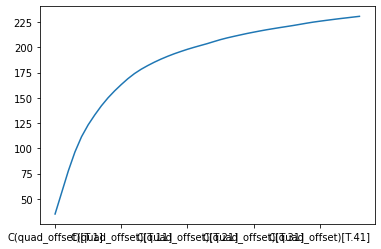

In [279]:
reg_popular_ratings.params[1:].plot()

In [274]:
reg_popular = smf.ols(formula="rating ~ C(quad_offset)", data=result[(result.index.isin(movie_data[movie_data["numReviews"] > 100]["tconst"])) & (result["quad_offset"] < 48)]).fit()

<AxesSubplot:>

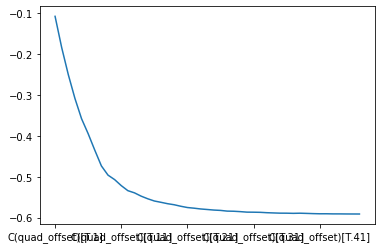

In [275]:
reg_popular.params[1:].plot()

In [276]:
reg_popular.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.8914,0.023,301.844,0.000,6.847,6.936
C(quad_offset)[T.1],-0.1078,0.032,-3.339,0.001,-0.171,-0.045
C(quad_offset)[T.2],-0.1842,0.032,-5.704,0.000,-0.247,-0.121
C(quad_offset)[T.3],-0.2504,0.032,-7.754,0.000,-0.314,-0.187
C(quad_offset)[T.4],-0.3084,0.032,-9.552,0.000,-0.372,-0.245
C(quad_offset)[T.5],-0.3579,0.032,-11.086,0.000,-0.421,-0.295
C(quad_offset)[T.6],-0.3946,0.032,-12.223,0.000,-0.458,-0.331
C(quad_offset)[T.7],-0.4348,0.032,-13.467,0.000,-0.498,-0.372
C(quad_offset)[T.8],-0.4734,0.032,-14.661,0.000,-0.537,-0.410
C(quad_offset)[T.9],-0.4959,0.032,-15.359,0.000,-0.559,-0.433


In [283]:
reg_ultra_popular = smf.ols(formula="rating ~ C(quad_offset)", data=result[(result.index.isin(movie_data[movie_data["numReviews"] > 1000]["tconst"])) & (result["quad_offset"] < 48)]).fit()

<AxesSubplot:>

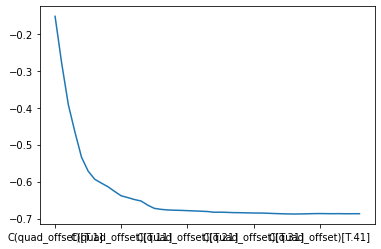

In [286]:
reg_ultra_popular.params[1:].plot()

In [294]:
reg_ultra_popular_ratings = smf.ols(formula="num_reviews ~ C(quad_offset)", data=result[(result.index.isin(movie_data[movie_data["numReviews"] > 1000]["tconst"])) & (result["quad_offset"] < 48)]).fit()

In [298]:
reg_ultra_popular_ratings.params

Intercept               768.614407
C(quad_offset)[T.1]     208.707627
C(quad_offset)[T.2]     316.546610
C(quad_offset)[T.3]     428.644068
C(quad_offset)[T.4]     515.974576
C(quad_offset)[T.5]     583.364407
C(quad_offset)[T.6]     629.402542
C(quad_offset)[T.7]     665.855932
C(quad_offset)[T.8]     700.072034
C(quad_offset)[T.9]     731.889831
C(quad_offset)[T.10]    757.097458
C(quad_offset)[T.11]    780.258475
C(quad_offset)[T.12]    800.245763
C(quad_offset)[T.13]    816.991525
C(quad_offset)[T.14]    831.139831
C(quad_offset)[T.15]    843.080508
C(quad_offset)[T.16]    854.813559
C(quad_offset)[T.17]    864.084746
C(quad_offset)[T.18]    872.881356
C(quad_offset)[T.19]    880.453390
C(quad_offset)[T.20]    886.953390
C(quad_offset)[T.21]    893.699153
C(quad_offset)[T.22]    899.796610
C(quad_offset)[T.23]    905.216102
C(quad_offset)[T.24]    911.004237
C(quad_offset)[T.25]    918.521186
C(quad_offset)[T.26]    925.601695
C(quad_offset)[T.27]    930.906780
C(quad_offset)[T.28]

<AxesSubplot:>

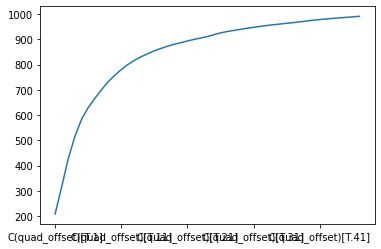

In [295]:
reg_ultra_popular_ratings.params[1:].plot()

I should probably try some dynamic panel stuff, that's totally what I have

# Setting up the problem

Based on the above, I can make do with the using the first 2 months to predict the rating after a year

Prediction model:
* start with naive model that rating won't change
* try naive model where rating drops by 0.6
* try a more complex xgboost model?

Framework:
* model 1 - given rating, votes so far, and time since release, can we estimate long term rating?
* model 2 - given all the data, can we estimate long term rating?

Let's start with the model 2 approach:

Does the idea of a stable long term rating make sense?

How might I check this? A rating is stable if it doesn't change much after like a year?

Evaluation framework:
* predict long-term rating (let's say one year out), based on data from the first two months
* in practice I would take a movie, time since release, and all of the data that I have so far, in order to predict

# A Simulation of Movie Choice

We're going to simulate a movie reviewing pattern
* we start with a bunch of people, each of whom draw an idiosyncratic belief in how good you think the movie will be
* in each period, you draw a sample and see if they'd be interested in seeing the movie
* people decide to watch the movie if the rating thus far plus their innate desire pass some threshold
* so yeah, maybe everyone has a threshold for when a movie is good enough (I think this might be somewhat redundant, let's just make a general cutoff)
* people watch and then leave a rating... the rating is correlated with their desire to see the movie, and to the quality of the movie itself.
* people get resampled if they haven't watched the movie yet

* parameters:
* number of people
* sample size for each period (think of this as the effect of marketing - small movies have few people considering watching)
* quality of the movie
* cutoff to watch the movie
* distribution of desire to watch

In [300]:
nobs = 1000

In [301]:
panel = pd.DataFrame([i for i in range(1,nobs+1)])

In [302]:
panel.rename(columns={0:"id"}, inplace=True)

In [303]:
np.random.seed(42)

In [304]:
panel["interest"] = np.random.uniform(low=1,high=10, size=nobs)

In [305]:
panel

,id,interest
0,1,4.370861
1,2,9.556429
2,3,7.587945
3,4,6.387926
4,5,2.404168
...,...,...
995,996,1.824239
996,997,9.255822
997,998,2.231368
998,999,9.552136


In [420]:
panel["watched"] = 0

panel["rating"] = 0

movie_quality = 8

nperiods = 1000

cutoff_to_watch = 8

sample_size = 100

ratings = pd.DataFrame({"avgrating": np.zeros(nperiods), "numvotes": np.zeros(nperiods)})

In [392]:
ratings.loc[0]["avgrating"]

0.0

In [397]:
nperiods = 2

In [478]:
#def runsim():
panel = pd.DataFrame([i for i in range(1,nobs+1)])
panel.rename(columns={0:"id"}, inplace=True)
panel["interest"] = np.random.uniform(low=1,high=10, size=nobs)
panel["watched"] = 0

panel["rating"] = 0

movie_quality = 8

nperiods = 50

cutoff_to_watch = 8

sample_size = 100

ratings = pd.DataFrame({"avgrating": np.zeros(nperiods), "numvotes": np.zeros(nperiods)})

In [479]:
t = 0
while t < nperiods:
    # sample the people who haven't watched
    s = panel[panel["watched"] == 0].sample(sample_size)#min(sample_size, (panel["watched"] == 0).sum()))
    # figure out who watches the movie
    if t > 0:
        weight = np.sqrt(ratings.loc[t-1]["numvotes"])/np.sqrt(nobs)
        interest = s["interest"]*(1-weight) + ratings.loc[t-1]["avgrating"]*weight
    else:
        interest = s["interest"]
    s = s[interest > cutoff_to_watch]
    # let those people rate the movie
    print(len(s))
    panel["watched"].loc[panel["id"].isin(s.id)] = 1#.loc[[s["id"], "watched"]] = 1
    s["watched"] = 1
    s["rating"] = movie_quality + (s["interest"] - 5)*0.2
    panel["rating"].loc[panel["id"].isin(s.id)] = movie_quality + (s["interest"] - 5)*0.2
    
    # store the new average rating
    if t > 0:
        new_count = ratings.loc[t-1]["numvotes"] + s.shape[0] if ratings.loc[t-1]["numvotes"] + s.shape[0] > 0 else 1
        new_rating = (ratings.loc[t-1]["avgrating"]*ratings.loc[t-1]["numvotes"] + s["rating"].sum()) / new_count
    else:
        new_count = s.shape[0] if s.shape[0] > 0 else 1
        new_rating = s["rating"].sum() / new_count
    ratings.loc[t]["avgrating"] = new_rating
    ratings.loc[t]["numvotes"] = new_count
    t += 1

24
20
21
21
10
16
9
12
12
16
11
14
14
6
10


/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

9
10
8
8
7
4
9
4
2
5
1
2
4
1
2
1
2
1
1
0
0
1
0
1
0


/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

2
0
0
2
1
0
0
0
1
0


/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/jordanlong/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [480]:
s

,id,interest,watched,rating


In [481]:
panel

,id,interest,watched,rating
0,1,2.429342,0,0.000000
1,2,1.250226,0,0.000000
2,3,3.528020,0,0.000000
3,4,2.092222,0,0.000000
4,5,5.248692,0,0.000000
...,...,...,...,...
995,996,9.315601,1,8.863120
996,997,2.365811,0,0.000000
997,998,3.952036,0,0.000000
998,999,2.923431,0,0.000000


In [482]:
panel["watched"].value_counts()

0    695
1    305
Name: watched, dtype: int64

In [483]:
panel["rating"].describe()

count    1000.000000
mean        2.659798
std         4.018097
min         0.000000
25%         0.000000
50%         0.000000
75%         8.527014
max         8.999095
Name: rating, dtype: float64

In [484]:
ratings

,avgrating,numvotes
0,8.807590,24.0
1,8.807705,44.0
2,8.807348,65.0
3,8.811596,86.0
4,8.799524,96.0
5,8.798652,112.0
6,8.798008,121.0
7,8.795283,133.0
8,8.794093,145.0
9,8.786447,161.0


<AxesSubplot:>

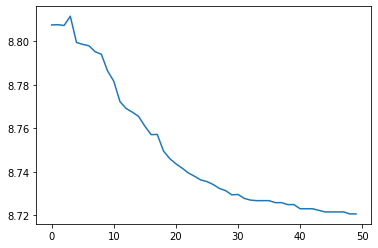

In [485]:
ratings["avgrating"].plot()

<AxesSubplot:>

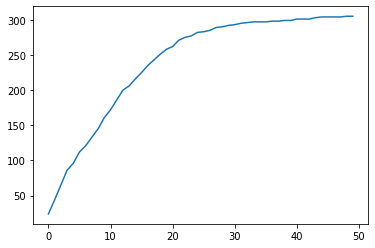

In [486]:
ratings["numvotes"].plot()

Summary: parameters to identify:
* distribution of interests
* cutoff to watch a movie
* sample size each round

How actual movies are distributed:

In [125]:
d

,user,movie,rating,date,userdate,year,month,tconst,titleType,primaryTitle,...,Fantasy,Animation,War,Music,Biography,Sport,History,Reality-TV,News,no_genre
0,ur4592644,tt0120884,10,2005-01-16,ur459264416 January 2005,2005,1,tt0120884,movie,When the Light Comes,...,0,0,0,0,0,0,0,0,0,0
1,ur9036543,tt0120884,8,2006-01-24,ur903654324 January 2006,2006,1,tt0120884,movie,When the Light Comes,...,0,0,0,0,0,0,0,0,0,0
2,ur11167152,tt0120884,8,2011-06-14,ur1116715214 June 2011,2011,6,tt0120884,movie,When the Light Comes,...,0,0,0,0,0,0,0,0,0,0
3,ur0055545,tt0120884,8,1999-05-16,ur005554516 May 1999,1999,5,tt0120884,movie,When the Light Comes,...,0,0,0,0,0,0,0,0,0,0
4,ur0338514,tt0120884,8,1999-05-22,ur033851422 May 1999,1999,5,tt0120884,movie,When the Light Comes,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444436,ur3574726,tt0070507,8,2005-01-12,ur357472612 January 2005,2005,1,tt0070507,movie,Panorama Blue,...,0,0,0,0,0,0,0,0,0,0
3444437,ur3513503,tt0432965,6,2005-01-12,ur351350312 January 2005,2005,1,tt0432965,movie,Mr. Patterns,...,0,0,0,0,0,0,0,0,0,0
3444438,ur1219578,tt0287448,3,2005-01-12,ur121957812 January 2005,2005,1,tt0287448,movie,The Warrior's Brother,...,0,0,0,0,0,0,1,0,0,0
3444439,ur4573074,tt0091926,10,2005-01-13,ur457307413 January 2005,2005,1,tt0091926,movie,The 17th Bride,...,0,0,0,0,0,0,0,0,0,0


In [222]:
d["movie"].nunique()

139631

In [130]:
d.set_index("date", inplace=True)

In [174]:
d.index = pd.to_datetime(d.index)

In [229]:
curmovie = d["primaryTitle"].sample().values[0]
print(curmovie)
curratings = d[d["primaryTitle"] == curmovie]["rating"].sort_index()

The Dark Knight


<AxesSubplot:xlabel='date'>

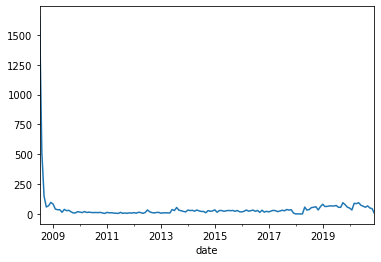

In [230]:
curratings.resample("M").count().plot()

In [233]:
curratings.resample("M").count()

date
2008-07-31    1657
2008-08-31     520
2008-09-30     149
2008-10-31      58
2008-11-30      68
              ... 
2020-08-31      56
2020-09-30      67
2020-10-31      50
2020-11-30      44
2020-12-31       4
Freq: M, Name: rating, Length: 150, dtype: int64

In [232]:
curratings.resample("M").mean()

date
2008-07-31     8.750754
2008-08-31     7.390385
2008-09-30     7.456376
2008-10-31     7.189655
2008-11-30     6.750000
                ...    
2020-08-31     9.089286
2020-09-30     9.328358
2020-10-31     9.040000
2020-11-30     9.704545
2020-12-31    10.000000
Freq: M, Name: rating, Length: 150, dtype: float64

<AxesSubplot:xlabel='date'>

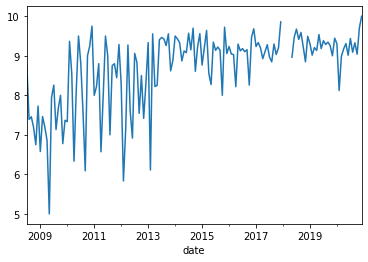

In [231]:
curratings.resample("M").mean().plot()

<AxesSubplot:xlabel='date'>

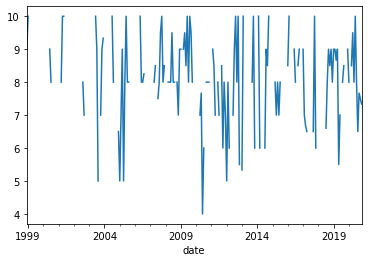

In [189]:
curratings.resample("M").mean().plot()

<AxesSubplot:xlabel='date'>

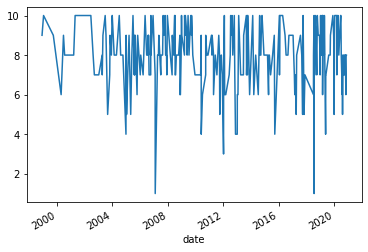

In [190]:
curratings.plot()

In [136]:
d[d["movie"] == cur_movie]["rating"].rolling(50).mean()

ValueError: Can only compare identically-labeled Series objects